## Практическая работа

## Цели практической работы

*  решить реальную задачу;
*  потренироваться в обработке данных;
*  обучить различные модели классификации, подобрать гиперпараметры и выбрать лучшую модель;
*  добиться наилучшего качества в задаче.

## Что входит в практическую работу

*  исследование датасета и обработка данных (работа с пропущенными и ошибочными значениями);
*  обучение различных моделей классификации с параметрами по умолчанию;
*  подбор гиперпараметров моделей;
*  смешивание моделей;
*  оценка качества моделей.

## Что оценивается

*  Выполнены все этапы задания: код запускается, отрабатывает без ошибок; подробно и обоснованно написаны текстовые выводы, где это требуется.

## Формат сдачи
Выполните предложенные задания: впишите свой код (или, если требуется, текст) в ячейки после комментариев. 

*Комментарии — это текст, который начинается с символа #. Например: # ваш код здесь.*

Сохраните изменения, используя опцию Save and Checkpoint из вкладки меню File или кнопку Save and Checkpoint на панели инструментов. Итоговый файл в формате .ipynb (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

### 1. Загрузите тренировочные и тестовые датасеты

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

### 2. Изучите тренировочные и тестовые данные на наличие:
- пропусков,
- ошибочных значений.

Обработайте пропуски и ошибочные значения способом, выбранным по своему усмотрению.

In [2]:
Xtrain.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.000000,7425.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,5625.000000,7500.000000,7500.000000,7500.000000,7490.000000,7500.000000,7500.000000,7500.000000,7500.000000
mean,38.579600,238.905308,1.903850e+05,0.238933,10.083200,0.238934,0.240556,0.238933,23.893333,0.238933,1068.693992,88.974933,40.670800,0.238955,0.238933
std,13.647719,76.198282,1.058674e+05,0.151738,2.546071,0.190283,0.147371,0.193365,4.451530,0.087708,7430.344770,404.517032,12.330051,0.041685,0.426460
min,17.000000,64.259070,1.930200e+04,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,0.000000,0.000000,1.000000,0.000080,0.000000
25%,28.000000,218.593930,1.180190e+05,0.171817,9.000000,0.049127,0.115721,0.066581,25.606721,0.113590,0.000000,0.000000,40.000000,0.244418,0.000000
50%,37.000000,218.593930,1.795685e+05,0.179322,10.000000,0.098837,0.241573,0.103024,25.606721,0.300298,0.000000,0.000000,40.000000,0.244418,0.000000
75%,47.000000,218.593930,2.394418e+05,0.239316,12.000000,0.445026,0.439103,0.444334,25.606721,0.300298,0.000000,0.000000,45.000000,0.244418,0.000000
max,90.000000,575.396825,1.226583e+06,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,99999.000000,4356.000000,99.000000,0.466666,1.000000


In [3]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [4]:
# Заполнение пропусков
Xtrain['f2'] = Xtrain['f2'].fillna(Xtrain['f2'].median())
Xtrain['f7'] = Xtrain['f7'].fillna(Xtrain['f7'].mean())
Xtrain['f11'] = Xtrain['f11'].fillna(Xtrain['f11'].median())

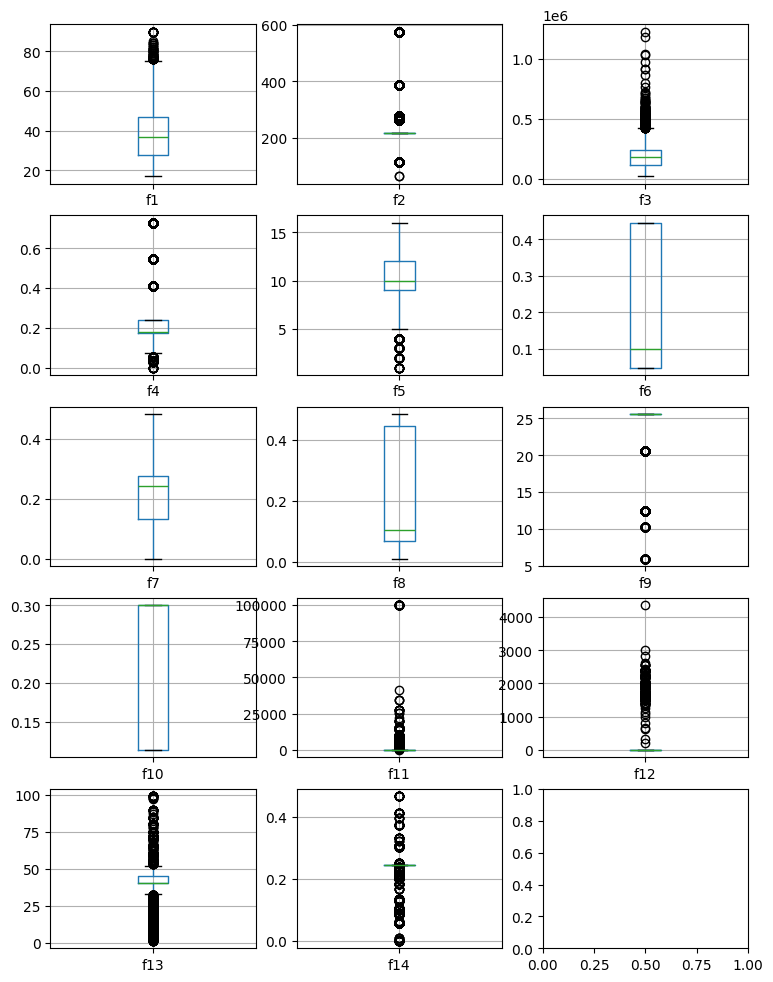

In [5]:
fig, ax = plt.subplots(5, 3)
fig.set_figheight(12)
fig.set_figwidth(9)

for i, col in enumerate(Xtrain.drop('target', axis=1)):
    Xtrain.boxplot(col, ax=ax[i // 3, i % 3])

# plt.show()

In [6]:
# f3, f11, f12, f13, f14
def replace_outliers(column):
    x = column.copy()
    q1, q3 = x.quantile(0.25), x.quantile(0.75)
    lb, rb = max(x.min(), q1 - 1.5*(q3 - q1)), min(x.max(), q3 + 1.5*(q3 - q1))
    x[x < lb] = lb
    x[x > rb] = rb
    return x

for col in ['f3', 'f11', 'f12', 'f13', 'f14']:
    Xtrain[col] = replace_outliers(Xtrain[col])


C:\Users\Jrytoeku Qtuhtc\AppData\Local\Temp\ipykernel_10900\4149247309.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '421575.875' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x[x > rb] = rb
C:\Users\Jrytoeku Qtuhtc\AppData\Local\Temp\ipykernel_10900\4149247309.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x[x < lb] = lb


In [7]:
Xtrain.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.0,7500.0,7500.000000,7.500000e+03,7500.000000
mean,38.579600,238.702194,187530.317183,0.238933,10.083200,0.238934,0.240556,0.238933,23.893333,0.238933,0.0,0.0,41.361333,2.444180e-01,0.238933
std,13.647719,75.843216,95747.386469,0.151738,2.546071,0.190283,0.127624,0.193365,4.451530,0.087708,0.0,0.0,6.232251,5.551485e-17,0.426460
min,17.000000,64.259070,19302.000000,0.000029,1.000000,0.049127,0.000000,0.009499,5.970149,0.113590,0.0,0.0,32.500000,2.444180e-01,0.000000
25%,28.000000,218.593930,118019.000000,0.171817,9.000000,0.049127,0.131370,0.066581,25.606721,0.113590,0.0,0.0,40.000000,2.444180e-01,0.000000
50%,37.000000,218.593930,179568.500000,0.179322,10.000000,0.098837,0.240556,0.103024,25.606721,0.300298,0.0,0.0,40.000000,2.444180e-01,0.000000
75%,47.000000,218.593930,239441.750000,0.239316,12.000000,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0.0,45.000000,2.444180e-01,0.000000
max,90.000000,575.396825,421575.875000,0.729323,16.000000,0.445026,0.482222,0.484375,25.606721,0.300298,0.0,0.0,52.500000,2.444180e-01,1.000000


In [8]:
Xtrain = Xtrain.drop(['f11', 'f12'], axis=1)

In [9]:
Xtest = Xtest.drop(['f11', 'f12'], axis=1)
Xtest.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f13,f14,target
count,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2500.000000,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2.500000e+03,2500.000000,2.500000e+03,2500.000000
mean,38.069200,2.389333e+02,191561.425200,2.389333e-01,10.056800,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,40.108800,2.389333e-01,0.234800
std,13.442168,8.528219e-14,107542.508483,5.552226e-17,2.554875,5.552226e-17,5.552226e-17,5.552226e-17,3.553424e-15,5.552226e-17,12.109914,5.552226e-17,0.423959
min,17.000000,2.389333e+02,19302.000000,2.389333e-01,1.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,3.000000,2.389333e-01,0.000000
25%,27.000000,2.389333e+02,119098.750000,2.389333e-01,9.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,38.750000,2.389333e-01,0.000000
50%,37.000000,2.389333e+02,177510.500000,2.389333e-01,10.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,40.000000,2.389333e-01,0.000000
75%,47.000000,2.389333e+02,238851.250000,2.389333e-01,12.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,45.000000,2.389333e-01,0.000000
max,90.000000,2.389333e+02,910398.000000,2.389333e-01,16.000000,2.389333e-01,2.389333e-01,2.389333e-01,2.389333e+01,2.389333e-01,99.000000,2.389333e-01,1.000000


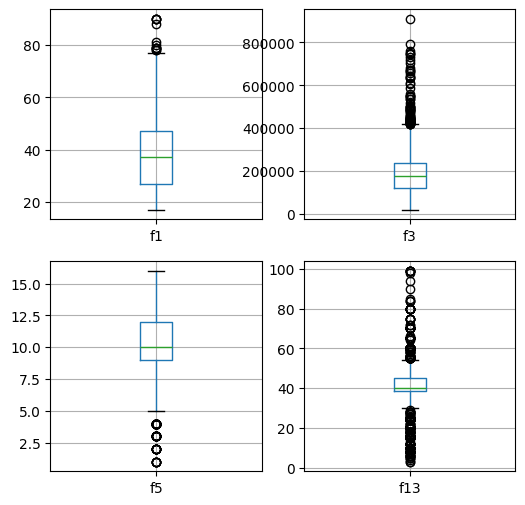

In [10]:
Xtest = Xtest.drop(['f2', 'f4', 'f6', 'f7', 'f8', 'f9', 'f10', 'f14'], axis=1)
Xtrain = Xtrain.drop(['f2', 'f4', 'f6', 'f7', 'f8', 'f9', 'f10', 'f14'], axis=1)

fig, ax = plt.subplots(2, 2)
fig.set_figheight(6)
fig.set_figwidth(6)

for i, col in enumerate(Xtest.drop('target', axis=1)):
    Xtest.boxplot(col, ax=ax[i // 2, i % 2])

In [11]:
for col in ['f3', 'f13']:
    Xtest[col] = replace_outliers(Xtest[col])


C:\Users\Jrytoeku Qtuhtc\AppData\Local\Temp\ipykernel_10900\4149247309.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '29.375' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  x[x < lb] = lb


### 3. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче? 

In [12]:
Xtrain['target'].value_counts()

target
0    5708
1    1792
Name: count, dtype: int64

In [13]:
Xtest['target'].value_counts()

target
0    1913
1     587
Name: count, dtype: int64

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test); 
- обучите KNN, LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test) и вычислите значение метрики f1.

In [64]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =  train_test_split(Xtrain.drop('target', axis=1), Xtrain['target'], test_size=0.25)

knn = KNeighborsClassifier()
logr = LogisticRegression()
svc = SVC()

knn.fit(x_train, y_train)
logr.fit(x_train, y_train)
svc.fit(x_train, y_train)

knn_pred = knn.predict(x_test)
logr_pred = logr.predict(x_test)
svc_pred = svc.predict(x_test)

f1_score(y_test, knn_pred), f1_score(y_test, logr_pred), f1_score(y_test, svc_pred)

c:\Users\Jrytoeku Qtuhtc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.17298937784522003, 0.04680851063829787, 0.0)

### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете подбирать гиперпараметры моделей (лучше это делать по кросс-валидации на Train, то есть с помощью использования GridSearchCV на Train);
- можете задавать class_weights;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

In [65]:
import numpy as np
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

In [66]:
k = 2
best_score = 0
for i in range(2, 44, 2):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', n_jobs=-1)
    knn.fit(x_train, y_train)
    score = cross_val_score(knn, x_train, y_train, scoring=make_scorer(f1_score))
    if score.mean() > best_score:
        k = i
        best_score = score.mean()

k, best_score

(2, 0.3060639586805233)

In [67]:
knn = KNeighborsClassifier(n_neighbors=2, weights='distance', n_jobs=-1)
knn.fit(x_train, y_train)
f1_score(y_test, knn.predict(x_test))

0.27699018538713194

In [69]:
logr = LogisticRegression(solver='liblinear', class_weight='balanced')

param_dist = {
    'C': np.random.uniform(1e-2, 100, 100), 
    'penalty': ['l1', 'l2'], 
    'max_iter': list(range(100, 800, 100)),  
}

rs = RandomizedSearchCV(
    estimator=logr,
    param_distributions=param_dist,
    n_iter=400,  
    scoring=make_scorer(f1_score),  
    cv=5,
    random_state=42,  
    n_jobs=-1
)

rs.fit(x_train, y_train)
rs.best_params_, rs.best_score_

({'penalty': 'l1', 'max_iter': 400, 'C': 32.16198202838255},
 0.5466089017255467)

In [74]:
logr = LogisticRegression(penalty='l1', max_iter=400, C=32.16, solver='liblinear', class_weight='balanced')
logr.fit(x_train, y_train)
val_proba = logr.predict_proba(x_test)[:, 1]

best_score = 0
thr = 0.5
for threshold in np.arange(0.01, 0.9, 0.01):
    score = f1_score(y_test, (val_proba > threshold).astype(int))
    if score > best_score:
        thr = threshold
        best_score = score

thr, f1_score(y_test, (logr.predict_proba(x_test)[:, 1] > thr).astype(int))

(0.53, 0.5515320334261838)

In [73]:
# linear 0.40667196187450355
# rbf 0.37166424065987386 
# rbf 0.15 0.38159070598748884

breg = 0.01
best_score = 0
reg = breg
while reg < 0.5:
    svc = SVC(C=reg, class_weight='balanced')
    svc.fit(x_train, y_train)
    score = f1_score(y_test, svc.predict(x_test))
    if score > best_score:
        breg = reg
        best_score = score
        print(breg, best_score)

    reg += 0.01

breg

0.01 0.3711453744493392
0.02 0.37787567302985803
0.03 0.3784313725490196
0.05 0.3785644051130777


0.05

### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [78]:
x_side, y_side = Xtest.drop('target', axis=1), Xtest['target']

logr = LogisticRegression(penalty='l1', max_iter=400, C=32.16, solver='liblinear', class_weight='balanced')
logr.fit(x_train, y_train)
f1_score(y_side, logr.predict(x_side))

0.5602165087956699

### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:

$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2.$$

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [82]:
logr = LogisticRegression(penalty='l1', max_iter=400, C=32.16, solver='liblinear', class_weight='balanced')
logr.fit(x_train, y_train)
logr_pred = logr.predict(x_test)

svc = SVC(C=0.05, class_weight='balanced')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)

ba = 0.01
best_score = 0
for alpha in np.arange(0.01, 0.99, 0.01):
    y_pred = alpha*logr_pred + (1 - alpha)*svc_pred
    y_pred = (y_pred > 0.53).astype(int)
    score = f1_score(y_test, y_pred)
    if score > best_score:
        ba = alpha
        best_score = score
        print(ba, best_score)

y_pred = ba*logr.predict(x_side) + (1 - ba)*svc.predict(x_side)
y_pred = (y_pred > 0.53).astype(int)
f1_score(y_side, y_pred)

0.01 0.3785644051130777
0.47000000000000003 0.5080568720379147
0.54 0.5449826989619377


0.5614035087719298

In [86]:
f1_score(y_side, (ba*logr.predict(x_side) + (1 - ba)*svc.predict(x_side) > 0.53).astype(int)) > f1_score(y_side, logr.predict(x_side))

False

В итоге значимо улучшить качество предсказания путём смешения моделей не удалось.

### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке? 
- Ваша модель переобучилась, недообучилась или обучилась как надо?

Были использованы кросс-валидация, случайный поиск и сравнение точности на тестовой выборке, указанием class_weights='balanced', а также подбор порога для логистической регрессии (порог по умолчанию оказался лучшим).

Максимальное качество на тестах 0.5515320334261838.

На отложенной выборке 0.5614035087719298.

Полученная модель точно не переобучилась, но при этом не совсем обучилась как надо из-за невысокого показателя метрики.

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.